# Book Recommendation System
A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.

In [1]:
!pip install scikit-learn matplotlib

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading in data

In [3]:
ratin = pd.read_csv('ratings.csv')

FileNotFoundError: [Errno 2] File b'ratings.csv' does not exist: b'ratings.csv'

In [14]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [15]:
dataset.shape

(981756, 3)

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [17]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [18]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [19]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [20]:
n_books = len(dataset.book_id.unique())
n_books

10000

## Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [21]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [12]:
from tensorflow.keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    #model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

Epoch 1/5


InvalidArgumentError: indices[0,0] = 25164 is not in [0, 744)
	 [[{{node User-Embedding/embedding_lookup}} = ResourceGather[Tindices=DT_INT32, _class=["loc:@training/Adam/gradients/User-Embedding/embedding_lookup_grad/Reshape"], dtype=DT_FLOAT, validate_indices=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](User-Embedding/embeddings, User-Embedding/Cast)]]

In [16]:
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 3s 17us/sample - loss: 0.7350


0.7350294633393298

In [17]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.7574162] 5
[3.8860679] 4
[2.9775124] 3
[3.871668] 5
[3.6516404] 3
[4.099251] 3
[3.667988] 3
[4.723693] 4
[4.337674] 3
[4.3703995] 5


[None, None, None, None, None, None, None, None, None, None]

## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [22]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/2
785404/785404 [==============================] - 169s 215us/step - loss: 0.7504
Epoch 2/2
785404/785404 [==============================] - 176s 224us/step - loss: 0.6849


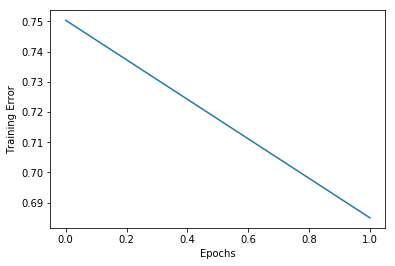

In [24]:
from tensorflow.keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=2, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [25]:
model2.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 5s 24us/step


0.723417259604613

In [26]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.7822814] 5
[3.5792437] 4
[3.2614822] 3
[3.9918144] 5
[3.1889546] 3
[3.973066] 3
[3.6765373] 3
[4.715391] 4
[3.994889] 3
[3.972822] 5


[None, None, None, None, None, None, None, None, None, None]

In [35]:
model2.outputs[0]

<tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 1) dtype=float32>

In [38]:
with tf.keras.backend.get_session() as sess:
    tf.saved_model.simple_save(sess,
            "export/test_rating",
            inputs={'user': model2.input[0], 'book' : model2.input[1]},
            outputs={'rating': model2.outputs[0]})
    print("exported the model")

Instructions for updating:
Pass your op to the equivalent parameter main_op instead.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.


RuntimeError: Attempted to use a closed Session.

## Making Recommendations

In [1]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

NameError: name 'np' is not defined

In [30]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [31]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([3627, 8945, 4867, 4482, 3519])

In [32]:
# print predicted scores
predictions[recommended_book_ids]

array([5.295861 , 5.207841 , 5.108308 , 5.0906634, 5.0777245],
      dtype=float32)

In [33]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [34]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3518,3519,31196,31196,2095259,152,1400034205,9.781400e+12,W. Somerset Maugham,1944.0,The Razor's Edge,...,25267,28640,2172,222,910,4563,10773,12172,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3626,3627,7592279,7592279,9985502,37,1741664489,9.781742e+12,John Flanagan,2011.0,NaN,...,29397,33357,1089,226,618,3569,9564,19380,https://images.gr-assets.com/books/1446448563m...,https://images.gr-assets.com/books/1446448563s...
4481,4482,73297,73297,281071,27,842342710,9.780842e+12,Francine Rivers,1995.0,The Scarlet Thread,...,21233,22189,715,235,821,4007,7627,9499,https://images.gr-assets.com/books/1406510347m...,https://images.gr-assets.com/books/1406510347s...
4866,4867,5215879,5215879,5283119,31,425227723,9.780425e+12,Laurell K. Hamilton,2009.0,Skin Trade,...,29261,31383,1081,952,2377,6995,9455,11604,https://images.gr-assets.com/books/1310494564m...,https://images.gr-assets.com/books/1310494564s...
8944,8945,32529,32529,3214115,40,752848267,9.780753e+12,Lisa Gardner,2001.0,The Next Accident,...,11261,13328,513,49,231,2323,5612,5113,https://images.gr-assets.com/books/1348816896m...,https://images.gr-assets.com/books/1348816896s...
